C:\Users\Hitech\AppData\Local\Temp\ipykernel_14556\4247688097.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB
None

First few rows of the dataset:
  buying  maint doors persons lug_boot safety  class
0  vhigh  vhigh     2       2    small    low  unacc
1  vhigh  vhigh     2       2    small    med  unacc
2  vhigh  vhigh     2       2    small   high  unacc
3  vhigh  vhigh     2       2      med    low  unacc
4  vhigh  vhigh     2       2      med    med  unacc

Summary Statistics of Numerical Columns:
       buying  maint doors persons lug_boot safety  class
count    1728   1728  1728    1728 

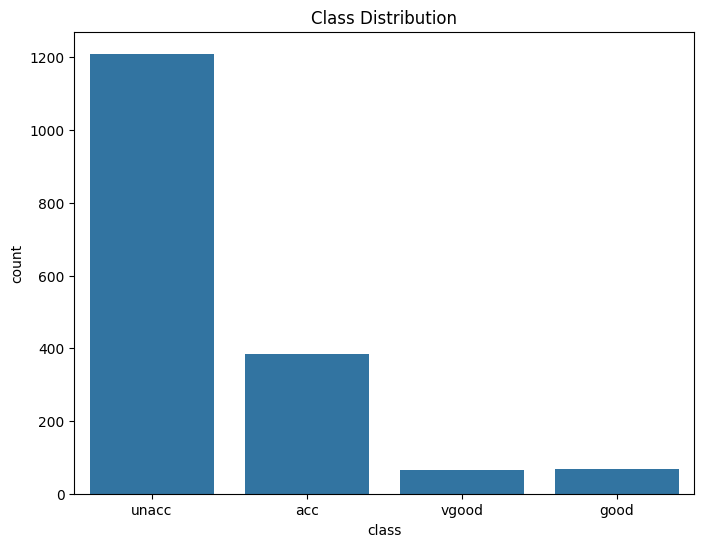

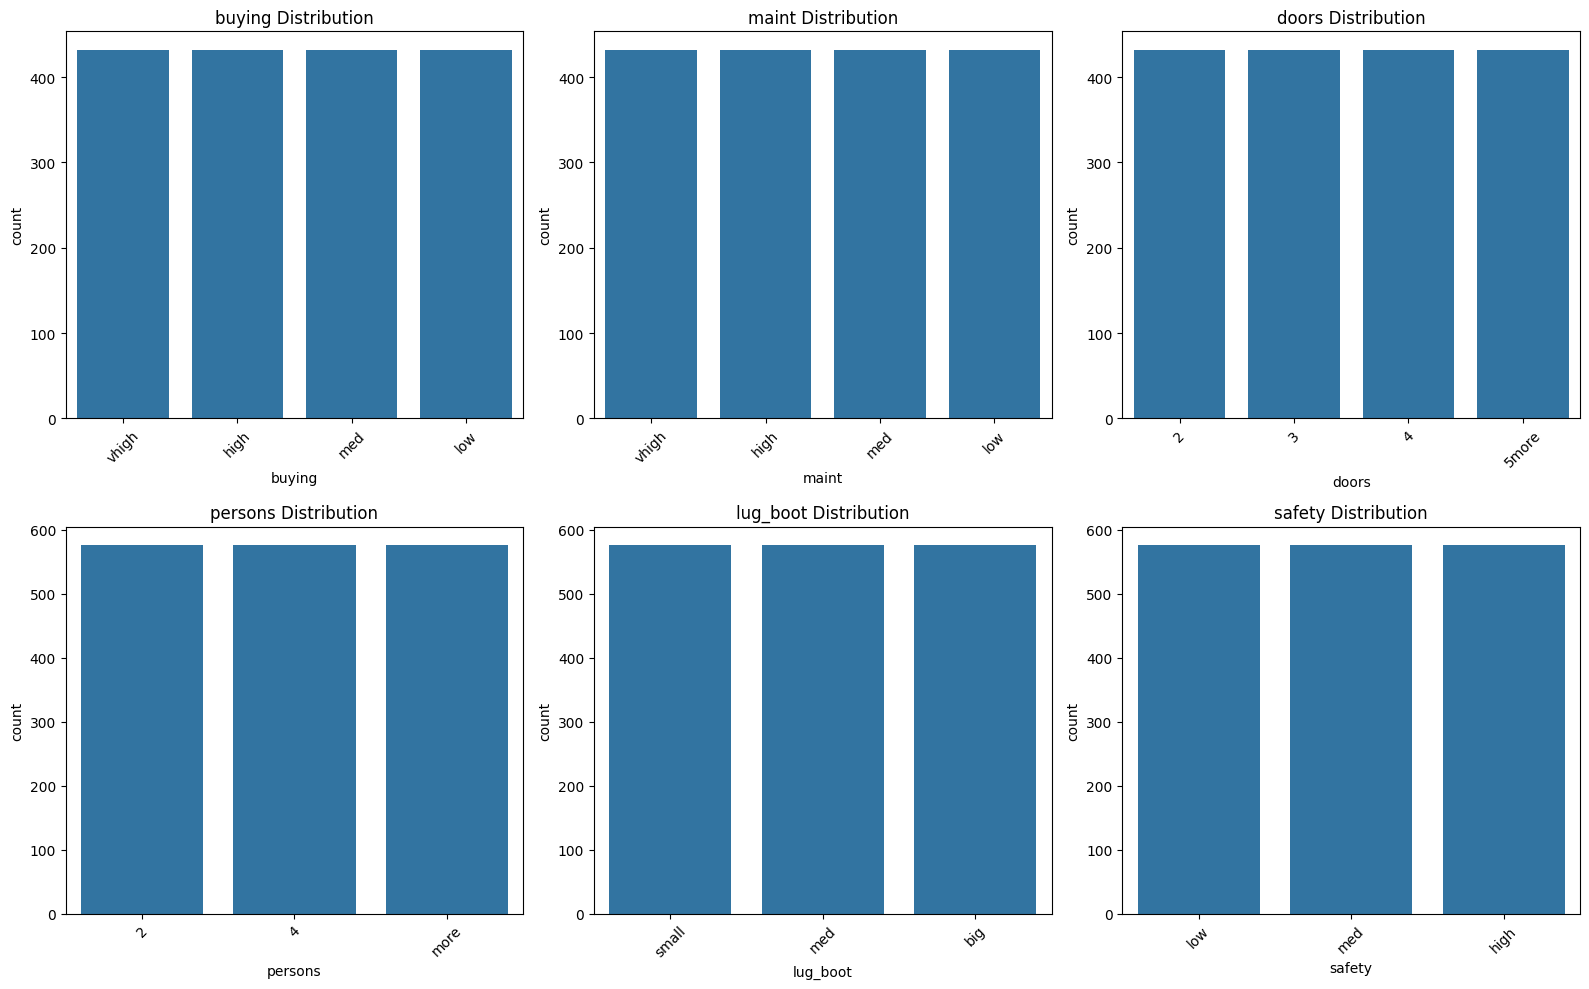

     buying  maint  doors persons lug_boot safety  class
0     vhigh  vhigh      2       2    small    low  unacc
1     vhigh  vhigh      2       2    small    med  unacc
2     vhigh  vhigh      2       2    small   high  unacc
3     vhigh  vhigh      2       2      med    low  unacc
4     vhigh  vhigh      2       2      med    med  unacc
...     ...    ...    ...     ...      ...    ...    ...
1723    low    low  5more    more      med    med   good
1724    low    low  5more    more      med   high  vgood
1725    low    low  5more    more      big    low  unacc
1726    low    low  5more    more      big    med   good
1727    low    low  5more    more      big   high  vgood

[1728 rows x 7 columns]


In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset

# Define column names as per dataset documentation
column_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
# Read the dataset into a DataFrame
df = pd.read_csv('car.csv', names=column_names)

# Display basic information about the dataset
print("Dataset Information:")
print(df.info())

# Display the first few rows of the dataset
print("\nFirst few rows of the dataset:")
print(df.head())

# Summary statistics of numerical columns
print("\nSummary Statistics of Numerical Columns:")
print(df.describe())

# Summary statistics of categorical columns
print("\nSummary Statistics of Categorical Columns:")
print(df.describe(include=['object']))

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Visualize class distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='class', data=df)
plt.title('Class Distribution')
plt.show()

# Visualize distribution of categorical features
plt.figure(figsize=(16, 10))
for i, column in enumerate(df.columns[:-1]):
    plt.subplot(2, 3, i+1)
    sns.countplot(x=column, data=df, order=df[column].value_counts().index)
    plt.title(f'{column} Distribution')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print(df)

# Now for further data analysis since we have all the coloumns as categorical

In [3]:
df.head

<bound method NDFrame.head of      buying  maint  doors persons lug_boot safety  class
0     vhigh  vhigh      2       2    small    low  unacc
1     vhigh  vhigh      2       2    small    med  unacc
2     vhigh  vhigh      2       2    small   high  unacc
3     vhigh  vhigh      2       2      med    low  unacc
4     vhigh  vhigh      2       2      med    med  unacc
...     ...    ...    ...     ...      ...    ...    ...
1723    low    low  5more    more      med    med   good
1724    low    low  5more    more      med   high  vgood
1725    low    low  5more    more      big    low  unacc
1726    low    low  5more    more      big    med   good
1727    low    low  5more    more      big   high  vgood

[1728 rows x 7 columns]>

In [4]:
#Data preprocessing

# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Load the dataset
# Define column names as per dataset documentation
column_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
# Read the dataset into a DataFrame
df = pd.read_csv('car.csv', names=column_names)

# Check for missing values
print("Missing Values:")
print(df.isnull().sum())  #No missing values in the datset

# Encode categorical variables
label_encoders = {}
for column in df.columns:
    if df[column].dtype == 'object':
        label_encoders[column] = LabelEncoder()
        df[column] = label_encoders[column].fit_transform(df[column])
print(df.head())


Missing Values:
buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64
   buying  maint  doors  persons  lug_boot  safety  class
0       3      3      0        0         2       1      2
1       3      3      0        0         2       2      2
2       3      3      0        0         2       0      2
3       3      3      0        0         1       1      2
4       3      3      0        0         1       2      2


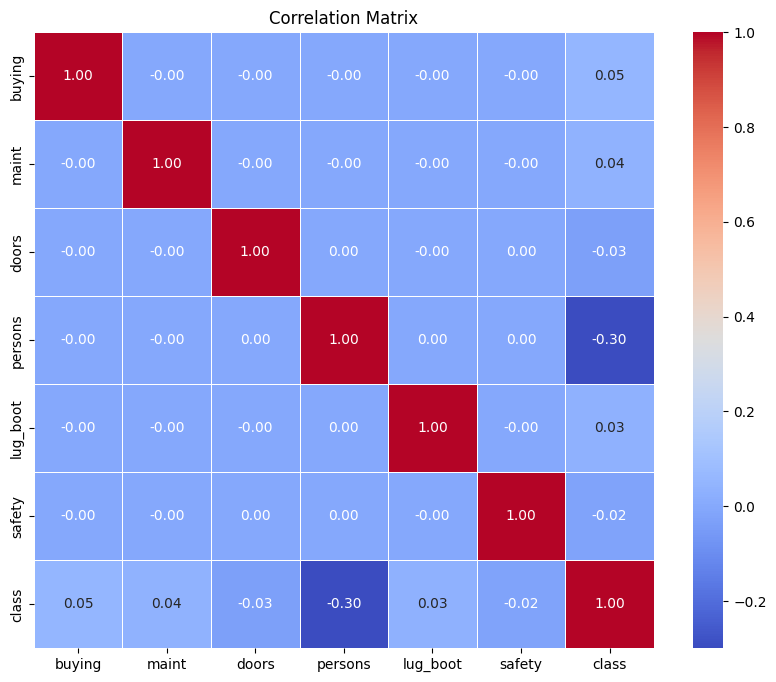

In [5]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

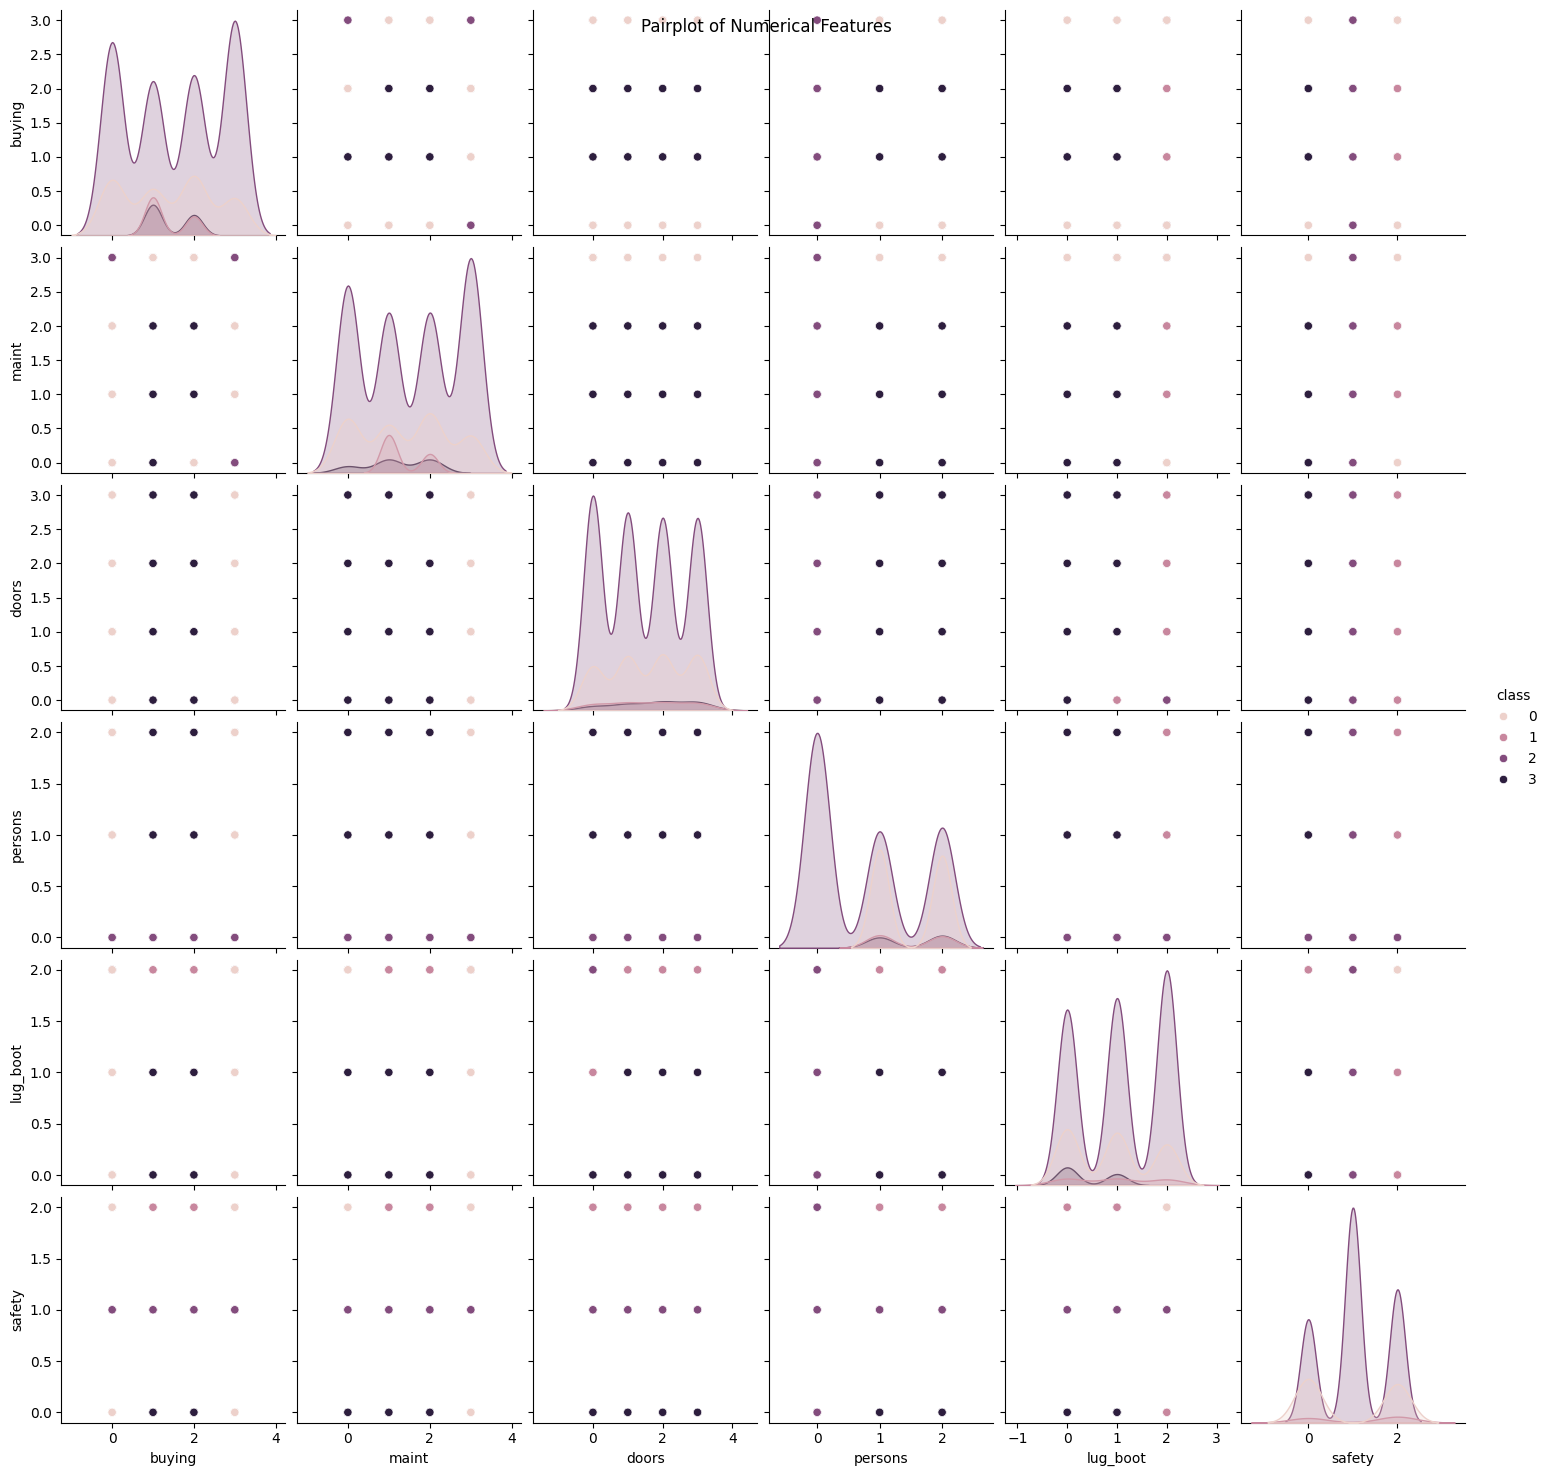

In [6]:
sns.pairplot(df, hue='class')
plt.suptitle('Pairplot of Numerical Features')
plt.show()

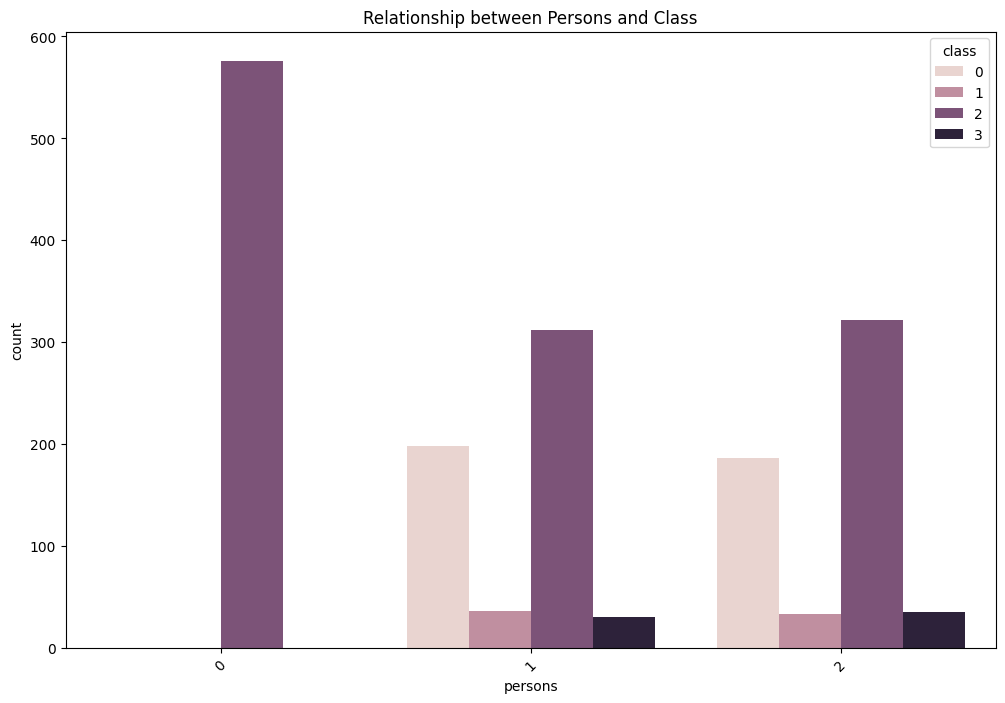

In [7]:
plt.figure(figsize=(12, 8))
sns.countplot(x='persons', hue='class', data=df)
plt.title('Relationship between Persons and Class')
plt.xticks(rotation=45)
plt.show()

In [8]:
df['persons_safety_interaction'] = df['persons'] * df['safety']

# Display the new dataset with interaction terms
print("\nNew dataset with interaction terms:")
# print(df.head())
print(df)


New dataset with interaction terms:
      buying  maint  doors  persons  lug_boot  safety  class  \
0          3      3      0        0         2       1      2   
1          3      3      0        0         2       2      2   
2          3      3      0        0         2       0      2   
3          3      3      0        0         1       1      2   
4          3      3      0        0         1       2      2   
...      ...    ...    ...      ...       ...     ...    ...   
1723       1      1      3        2         1       2      1   
1724       1      1      3        2         1       0      3   
1725       1      1      3        2         0       1      2   
1726       1      1      3        2         0       2      1   
1727       1      1      3        2         0       0      3   

      persons_safety_interaction  
0                              0  
1                              0  
2                              0  
3                              0  
4                  

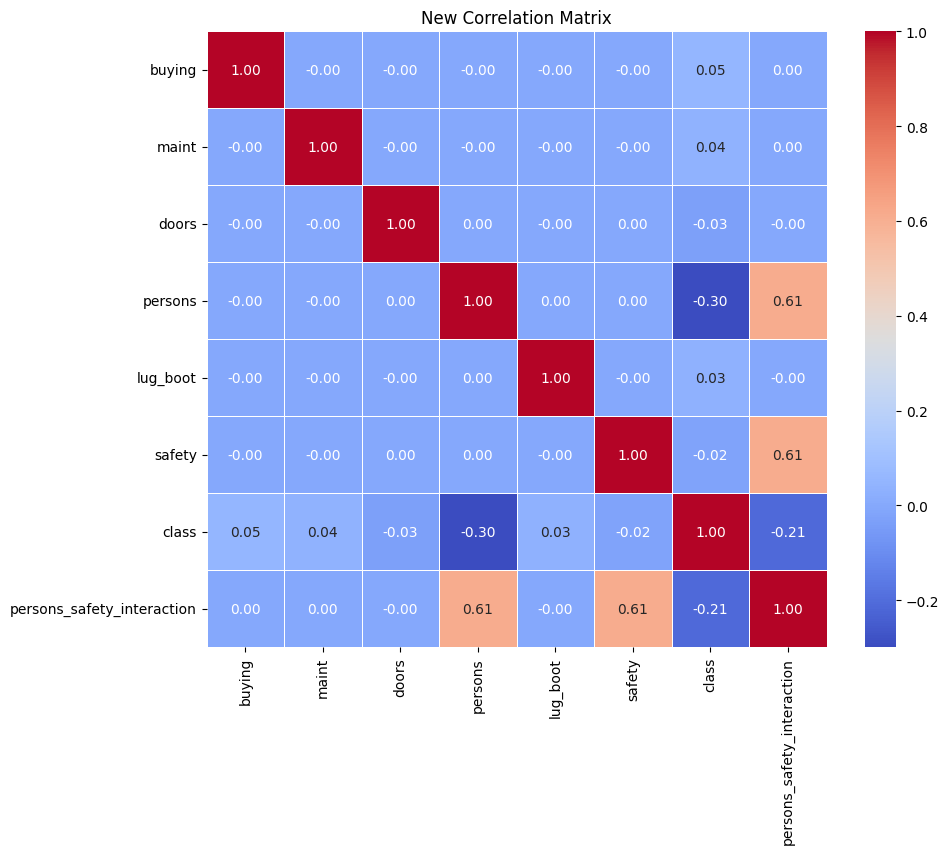

In [9]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('New Correlation Matrix')
plt.show()

In [10]:
#Splitting the dataaset

from sklearn.model_selection import train_test_split

# Split the dataset into features (X) and target variable (y)
X = df.drop('class', axis=1)
y = df['class']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [11]:
#Logistic Regression 


from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix


# Model training
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Model evaluation
y_pred = log_reg.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred, zero_division=1))  # Set zero_division to 1 to suppress the warning

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.26      0.13      0.17        83
           1       1.00      0.00      0.00        11
           2       0.73      0.92      0.81       235
           3       0.00      0.00      0.00        17

    accuracy                           0.66       346
   macro avg       0.50      0.26      0.25       346
weighted avg       0.59      0.66      0.59       346


Confusion Matrix:
[[ 11   0  69   3]
 [  3   0   8   0]
 [ 17   0 217   1]
 [ 12   0   5   0]]


In [12]:
from sklearn.tree import DecisionTreeClassifier

# Split the dataset into features (X) and target variable (y) - already done
# Model training
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)

# Model evaluation
y_pred = dt_classifier.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.92      0.94        83
           1       0.56      0.91      0.69        11
           2       1.00      1.00      1.00       235
           3       1.00      0.82      0.90        17

    accuracy                           0.97       346
   macro avg       0.88      0.91      0.88       346
weighted avg       0.98      0.97      0.97       346

Confusion Matrix:
[[ 76   6   1   0]
 [  1  10   0   0]
 [  0   0 235   0]
 [  1   2   0  14]]


In [13]:
from sklearn.ensemble import RandomForestClassifier

# Split the dataset into features (X) and target variable (y) - already done
# Model training
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)

# Model evaluation
y_pred = rf_classifier.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.87      0.92        83
           1       0.65      1.00      0.79        11
           2       0.98      1.00      0.99       235
           3       0.94      0.94      0.94        17

    accuracy                           0.97       346
   macro avg       0.89      0.95      0.91       346
weighted avg       0.97      0.97      0.97       346

Confusion Matrix:
[[ 72   6   4   1]
 [  0  11   0   0]
 [  0   0 235   0]
 [  1   0   0  16]]


In [14]:
from sklearn.svm import SVC

# Split the dataset into features (X) and target variable (y) - already done
# Model training
svc_classifier = SVC()
svc_classifier.fit(X_train, y_train)

# Model evaluation
y_pred = svc_classifier.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.83      0.84        83
           1       0.60      0.27      0.38        11
           2       0.95      0.98      0.97       235
           3       0.94      0.88      0.91        17

    accuracy                           0.92       346
   macro avg       0.83      0.74      0.77       346
weighted avg       0.91      0.92      0.91       346

Confusion Matrix:
[[ 69   2  12   0]
 [  7   3   0   1]
 [  4   0 231   0]
 [  2   0   0  15]]


In [15]:
from sklearn.neighbors import KNeighborsClassifier

# Split the dataset into features (X) and target variable (y) - already done
# Model training
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train, y_train)

# Model evaluation
y_pred = knn_classifier.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.89      0.86        83
           1       0.73      0.73      0.73        11
           2       0.97      0.96      0.97       235
           3       0.93      0.76      0.84        17

    accuracy                           0.93       346
   macro avg       0.87      0.84      0.85       346
weighted avg       0.93      0.93      0.93       346

Confusion Matrix:
[[ 74   2   6   1]
 [  3   8   0   0]
 [  9   0 226   0]
 [  3   1   0  13]]


In [35]:
from sklearn.neural_network import MLPClassifier

# Model 6: Neural Network Classifier
print("\nModel 6: Neural Network Classifier")
model_nn = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000)
model_nn.fit(X_train, y_train)
y_pred_nn = model_nn.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred_nn))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_nn))


Model 6: Neural Network Classifier
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.93      0.94        83
           1       0.79      1.00      0.88        11
           2       0.98      0.99      0.98       235
           3       1.00      0.88      0.94        17

    accuracy                           0.97       346
   macro avg       0.93      0.95      0.94       346
weighted avg       0.97      0.97      0.97       346

Confusion Matrix:
[[ 77   1   5   0]
 [  0  11   0   0]
 [  2   1 232   0]
 [  1   1   0  15]]


In [17]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Define pipeline
pipe_lr = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', LogisticRegression(max_iter=10000))
])

# Define parameter grid
param_grid_lr = {
    'clf__C': [0.001, 0.01, 0.1, 1, 10, 100],
    'clf__solver': ['liblinear', 'saga']
}

# Perform GridSearchCV
grid_lr = GridSearchCV(pipe_lr, param_grid_lr, cv=5)
grid_lr.fit(X_train, y_train)

best_params = grid_lr.best_params_
print("Best Parameters:", best_params)

# Predict on the testing set using the best model
best_classifier = grid_lr.best_estimator_
y_pred = best_classifier.predict(X_test)

# Evaluate the model
print("\nClassification Report:")
print(classification_report(y_test, y_pred, zero_division=0))


print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))



Best Parameters: {'clf__C': 0.01, 'clf__solver': 'saga'}

Classification Report:
              precision    recall  f1-score   support

           0       0.32      0.08      0.13        83
           1       0.00      0.00      0.00        11
           2       0.70      0.96      0.81       235
           3       0.00      0.00      0.00        17

    accuracy                           0.67       346
   macro avg       0.25      0.26      0.24       346
weighted avg       0.55      0.67      0.58       346


Confusion Matrix:
[[  7   0  76   0]
 [  1   0  10   0]
 [  9   0 226   0]
 [  5   0  12   0]]


In [18]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

# Define parameter distributions for RandomizedSearchCV
param_dist_lr = {
    'clf__C': uniform(0.001, 1000),
    'clf__solver': ['liblinear', 'saga']
}

# Perform RandomizedSearchCV
random_lr = RandomizedSearchCV(pipe_lr, param_distributions=param_dist_lr, n_iter=10, cv=5, random_state=42)
random_lr.fit(X_train, y_train)

best_params_random = random_lr.best_params_
print("Best Parameters:", best_params_random)

# Predict on the testing set using the best model
best_classifier_random = random_lr.best_estimator_
y_pred = best_classifier_random.predict(X_test)


# Evaluate the model
print("\nClassification Report:")
print(classification_report(y_test, y_pred, zero_division=0))


print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))



Best Parameters: {'clf__C': 183.4357898661638, 'clf__solver': 'saga'}

Classification Report:
              precision    recall  f1-score   support

           0       0.25      0.13      0.17        83
           1       0.00      0.00      0.00        11
           2       0.73      0.92      0.81       235
           3       0.00      0.00      0.00        17

    accuracy                           0.66       346
   macro avg       0.24      0.26      0.25       346
weighted avg       0.55      0.66      0.59       346


Confusion Matrix:
[[ 11   0  68   4]
 [  3   0   8   0]
 [ 18   0 216   1]
 [ 12   0   5   0]]


In [19]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Define pipeline
pipe_dt = Pipeline([
    ('clf', DecisionTreeClassifier())
])

# Define parameter grid
param_grid_dt = {
    'clf__criterion': ['gini', 'entropy'],
    'clf__max_depth': [None, 10, 20, 30, 40, 50],
    'clf__min_samples_split': [2, 5, 10],
    'clf__min_samples_leaf': [1, 2, 4],
    'clf__max_features': ['sqrt', 'log2', None]
}

# Perform GridSearchCV
grid_dt = GridSearchCV(pipe_dt, param_grid_dt, cv=5)
grid_dt.fit(X_train, y_train)

# Print best parameters
print("Best Parameters (GridSearchCV):", grid_dt.best_params_)

# Predict on the testing set using the best model
best_classifier_dt = grid_dt.best_estimator_
y_pred_dt = best_classifier_dt.predict(X_test)

# Evaluate the model
print("\nClassification Report:")
print(classification_report(y_test, y_pred_dt))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_dt))


Best Parameters (GridSearchCV): {'clf__criterion': 'entropy', 'clf__max_depth': None, 'clf__max_features': None, 'clf__min_samples_leaf': 1, 'clf__min_samples_split': 2}

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.92      0.94        83
           1       0.56      0.91      0.69        11
           2       1.00      1.00      1.00       235
           3       1.00      0.82      0.90        17

    accuracy                           0.97       346
   macro avg       0.88      0.91      0.88       346
weighted avg       0.98      0.97      0.97       346


Confusion Matrix:
[[ 76   6   1   0]
 [  1  10   0   0]
 [  0   0 235   0]
 [  1   2   0  14]]


In [20]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Define parameter distributions for RandomizedSearchCV
param_dist_dt = {
    'clf__criterion': ['gini', 'entropy'],
    'clf__max_depth': [None, 10, 20, 30, 40, 50],
    'clf__min_samples_split': randint(2, 11),
    'clf__min_samples_leaf': randint(1, 5),
    'clf__max_features': ['sqrt', 'log2', None]
}

# Perform RandomizedSearchCV
random_dt = RandomizedSearchCV(pipe_dt, param_distributions=param_dist_dt, n_iter=10, cv=5, random_state=42)
random_dt.fit(X_train, y_train)

# Print best parameters
print("Best Parameters (RandomizedSearchCV):", random_dt.best_params_)

# Predict on the testing set using the best model
best_classifier_dt_random = random_dt.best_estimator_
y_pred_dt_random = best_classifier_dt_random.predict(X_test)

# Evaluate the model
print("\nClassification Report:")
print(classification_report(y_test, y_pred_dt_random))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_dt_random))


Best Parameters (RandomizedSearchCV): {'clf__criterion': 'gini', 'clf__max_depth': 40, 'clf__max_features': None, 'clf__min_samples_leaf': 2, 'clf__min_samples_split': 4}

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.87      0.92        83
           1       0.50      0.91      0.65        11
           2       0.99      1.00      0.99       235
           3       0.93      0.82      0.88        17

    accuracy                           0.95       346
   macro avg       0.85      0.90      0.86       346
weighted avg       0.97      0.95      0.96       346


Confusion Matrix:
[[ 72   8   3   0]
 [  0  10   0   1]
 [  1   0 234   0]
 [  1   2   0  14]]


In [21]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Define pipeline
pipe_rf = Pipeline([
    ('clf', RandomForestClassifier())
])

# Define parameter grid
param_grid_rf = {
    'clf__n_estimators': [100, 200, 300],
    'clf__max_depth': [None, 10, 20, 30],
    'clf__min_samples_split': [2, 5, 10],
    'clf__min_samples_leaf': [1, 2, 4],
    'clf__max_features': ['sqrt', 'log2', None]  # Corrected parameter values
}

# Perform RandomizedSearchCV
random_search_rf = RandomizedSearchCV(pipe_rf, param_distributions=param_grid_rf, n_iter=10, cv=5, random_state=42)
random_search_rf.fit(X_train, y_train)

# Print best parameters
print("Best Parameters (RandomizedSearchCV):", random_search_rf.best_params_)

# Predict on the testing set using the best model
best_classifier_rf = random_search_rf.best_estimator_
y_pred_rf = best_classifier_rf.predict(X_test)

# Evaluate the model
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))



Best Parameters (RandomizedSearchCV): {'clf__n_estimators': 300, 'clf__min_samples_split': 2, 'clf__min_samples_leaf': 1, 'clf__max_features': None, 'clf__max_depth': 10}

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.87      0.92        83
           1       0.45      0.91      0.61        11
           2       1.00      1.00      1.00       235
           3       0.93      0.82      0.88        17

    accuracy                           0.96       346
   macro avg       0.84      0.90      0.85       346
weighted avg       0.97      0.96      0.96       346


Confusion Matrix:
[[ 72  10   1   0]
 [  0  10   0   1]
 [  0   0 235   0]
 [  1   2   0  14]]


In [22]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

# Define pipeline
pipe_svc = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', SVC())
])

# Define parameter grid
param_grid_svc = {
    'clf__C': [0.1, 1, 10],
    'clf__kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'clf__gamma': ['scale', 'auto']
}

# Perform GridSearchCV
grid_svc = GridSearchCV(pipe_svc, param_grid_svc, cv=5)
grid_svc.fit(X_train, y_train)

# Print best parameters
print("Best Parameters (GridSearchCV):", grid_svc.best_params_)

# Predict on the testing set using the best model
best_classifier_svc = grid_svc.best_estimator_
y_pred_svc = best_classifier_svc.predict(X_test)

# Evaluate the model
print("\nClassification Report:")
print(classification_report(y_test, y_pred_svc))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_svc))


Best Parameters (GridSearchCV): {'clf__C': 10, 'clf__gamma': 'scale', 'clf__kernel': 'rbf'}

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.87      0.92        83
           1       0.58      1.00      0.73        11
           2       0.99      1.00      0.99       235
           3       1.00      0.94      0.97        17

    accuracy                           0.97       346
   macro avg       0.89      0.95      0.90       346
weighted avg       0.97      0.97      0.97       346


Confusion Matrix:
[[ 72   8   3   0]
 [  0  11   0   0]
 [  0   0 235   0]
 [  1   0   0  16]]


In [23]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

# Define parameter distributions for RandomizedSearchCV
param_dist_svc = {
    'clf__C': uniform(0.1, 10),
    'clf__kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'clf__gamma': ['scale', 'auto']
}

# Perform RandomizedSearchCV
random_svc = RandomizedSearchCV(pipe_svc, param_distributions=param_dist_svc, n_iter=10, cv=5, random_state=42)
random_svc.fit(X_train, y_train)

# Print best parameters
print("Best Parameters (RandomizedSearchCV):", random_svc.best_params_)

# Predict on the testing set using the best model
best_classifier_svc_random = random_svc.best_estimator_
y_pred_svc_random = best_classifier_svc_random.predict(X_test)

# Evaluate the model
print("\nClassification Report:")
print(classification_report(y_test, y_pred_svc_random))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_svc_random))


Best Parameters (RandomizedSearchCV): {'clf__C': 6.1111501174320875, 'clf__gamma': 'auto', 'clf__kernel': 'rbf'}

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.86      0.92        83
           1       0.56      0.91      0.69        11
           2       0.98      1.00      0.99       235
           3       0.94      0.94      0.94        17

    accuracy                           0.96       346
   macro avg       0.87      0.93      0.88       346
weighted avg       0.97      0.96      0.96       346


Confusion Matrix:
[[ 71   8   4   0]
 [  0  10   0   1]
 [  0   0 235   0]
 [  1   0   0  16]]


In [24]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

# Define pipeline
pipe_knn = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', KNeighborsClassifier())
])

# Define parameter grid
param_grid_knn = {
    'clf__n_neighbors': [3, 5, 7, 9],
    'clf__weights': ['uniform', 'distance'],
    'clf__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'clf__p': [1, 2]
}

# Perform GridSearchCV
grid_knn = GridSearchCV(pipe_knn, param_grid_knn, cv=5)
grid_knn.fit(X_train, y_train)

# Print best parameters
print("Best Parameters (GridSearchCV):", grid_knn.best_params_)

# Predict on the testing set using the best model
best_classifier_knn = grid_knn.best_estimator_
y_pred_knn = best_classifier_knn.predict(X_test)

# Evaluate the model
print("\nClassification Report:")
print(classification_report(y_test, y_pred_knn))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_knn))


Best Parameters (GridSearchCV): {'clf__algorithm': 'auto', 'clf__n_neighbors': 5, 'clf__p': 1, 'clf__weights': 'uniform'}

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.94      0.87        83
           1       1.00      0.64      0.78        11
           2       0.98      0.96      0.97       235
           3       0.92      0.71      0.80        17

    accuracy                           0.93       346
   macro avg       0.93      0.81      0.85       346
weighted avg       0.94      0.93      0.93       346


Confusion Matrix:
[[ 78   0   4   1]
 [  4   7   0   0]
 [ 10   0 225   0]
 [  5   0   0  12]]


In [25]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Define parameter distributions for RandomizedSearchCV
param_dist_knn = {
    'clf__n_neighbors': randint(1, 20),
    'clf__weights': ['uniform', 'distance'],
    'clf__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'clf__p': [1, 2]
}

# Perform RandomizedSearchCV
random_knn = RandomizedSearchCV(pipe_knn, param_distributions=param_dist_knn, n_iter=10, cv=5, random_state=42)
random_knn.fit(X_train, y_train)

# Print best parameters
print("Best Parameters (RandomizedSearchCV):", random_knn.best_params_)

# Predict on the testing set using the best model
best_classifier_knn_random = random_knn.best_estimator_
y_pred_knn_random = best_classifier_knn_random.predict(X_test)

# Evaluate the model
print("\nClassification Report:")
print(classification_report(y_test, y_pred_knn_random))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_knn_random))


Best Parameters (RandomizedSearchCV): {'clf__algorithm': 'auto', 'clf__n_neighbors': 4, 'clf__p': 2, 'clf__weights': 'distance'}

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.93      0.88        83
           1       1.00      0.82      0.90        11
           2       0.98      0.96      0.97       235
           3       0.87      0.76      0.81        17

    accuracy                           0.94       346
   macro avg       0.92      0.87      0.89       346
weighted avg       0.94      0.94      0.94       346


Confusion Matrix:
[[ 77   0   4   2]
 [  2   9   0   0]
 [ 10   0 225   0]
 [  4   0   0  13]]


In [26]:
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC

# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=10000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "K Nearest Neighbors": KNeighborsClassifier(),
    "MLP Classifier": MLPClassifier(max_iter=1000),
    "Support Vector Classifier": SVC()
}

# Define pipeline for models that require scaling
scaled_models = {
    "Logistic Regression": Pipeline([
        ('scaler', StandardScaler()),
        ('clf', LogisticRegression(max_iter=10000))
    ]),
    "MLP Classifier": Pipeline([
        ('scaler', StandardScaler()),
        ('clf', MLPClassifier(max_iter=1000))
    ]),
    "Support Vector Classifier": Pipeline([
        ('scaler', StandardScaler()),
        ('clf', SVC())
    ])
}

# Evaluate models
results = {}
for name, model in models.items():
    if name in scaled_models:
        scores = cross_val_score(scaled_models[name], X_train, y_train, cv=5)
    else:
        scores = cross_val_score(model, X_train, y_train, cv=5)
    results[name] = scores

# Display results
for name, scores in results.items():
    print(f"{name}: Accuracy = {scores.mean():.4f} (+/- {scores.std() * 2:.4f})")


Logistic Regression: Accuracy = 0.6939 (+/- 0.0164)
Decision Tree: Accuracy = 0.9761 (+/- 0.0162)
Random Forest: Accuracy = 0.9522 (+/- 0.0369)
K Nearest Neighbors: Accuracy = 0.9045 (+/- 0.0352)
MLP Classifier: Accuracy = 0.9689 (+/- 0.0249)
Support Vector Classifier: Accuracy = 0.8784 (+/- 0.0496)


In [27]:
from sklearn.model_selection import cross_val_score

# Models
models = {
    'Logistic Regression': grid_lr.best_estimator_,
    'Decision Tree': grid_dt.best_estimator_,
    "Random Forest": RandomForestClassifier(),
    'K Nearest Neighbors': grid_knn.best_estimator_,
    'Support Vector Classifier': grid_svc.best_estimator_,
    "MLP Classifier": MLPClassifier(max_iter=10000),
}

# Results dictionary to store accuracy scores
results = {}

# Calculate accuracy for each model
for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    results[name] = scores

# Display results
for name, scores in results.items():
    print(f"{name}: Accuracy = {scores.mean():.4f} (+/- {scores.std() * 2:.4f})")


Logistic Regression: Accuracy = 0.7106 (+/- 0.0250)
Decision Tree: Accuracy = 0.9812 (+/- 0.0106)
Random Forest: Accuracy = 0.9566 (+/- 0.0268)
K Nearest Neighbors: Accuracy = 0.9189 (+/- 0.0361)
Support Vector Classifier: Accuracy = 0.9754 (+/- 0.0125)
MLP Classifier: Accuracy = 0.9696 (+/- 0.0323)


In [28]:
from sklearn.model_selection import cross_val_score

# Models after randomized search
models_randomized_search = {
    'Logistic Regression': random_lr.best_estimator_,
    'Decision Tree': random_dt.best_estimator_,
    'Random Forest': random_search_rf.best_estimator_,
    'K Nearest Neighbors': random_knn.best_estimator_,
    'Support Vector Classifier': random_svc.best_estimator_,
    "MLP Classifier": MLPClassifier(max_iter=10000),
}

# Results dictionary to store accuracy scores
results_randomized_search = {}

# Calculate accuracy for each model
for name, model in models_randomized_search.items():
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    results_randomized_search[name] = scores

# Display results
for name, scores in results_randomized_search.items():
    print(f"{name}: Accuracy = {scores.mean():.4f} (+/- {scores.std() * 2:.4f})")


Logistic Regression: Accuracy = 0.6954 (+/- 0.0154)
Decision Tree: Accuracy = 0.9617 (+/- 0.0141)
Random Forest: Accuracy = 0.9783 (+/- 0.0046)
K Nearest Neighbors: Accuracy = 0.9008 (+/- 0.0555)
Support Vector Classifier: Accuracy = 0.9696 (+/- 0.0156)
MLP Classifier: Accuracy = 0.9682 (+/- 0.0260)


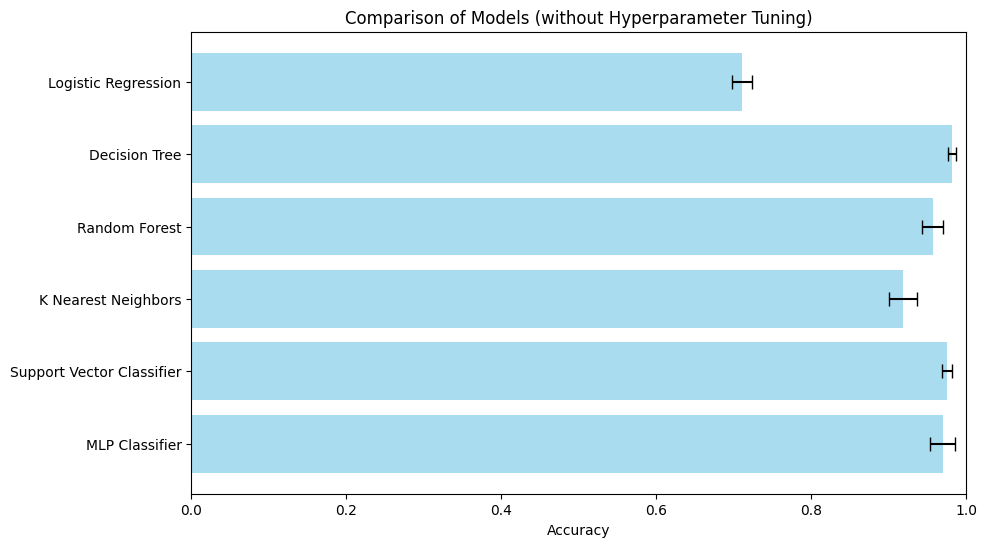

In [29]:
import matplotlib.pyplot as plt
import numpy as np

# Mean accuracy scores and standard deviations
mean_scores = [scores.mean() for scores in results.values()]
std_devs = [scores.std() for scores in results.values()]

# Model names
models = list(results.keys())

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(models, mean_scores, xerr=std_devs, color='skyblue', alpha=0.7, capsize=5)
plt.xlabel('Accuracy')
plt.title('Comparison of Models (without Hyperparameter Tuning)')
plt.xlim(0, 1)
plt.gca().invert_yaxis()  # Invert y-axis to display the highest accuracy on top
plt.show()


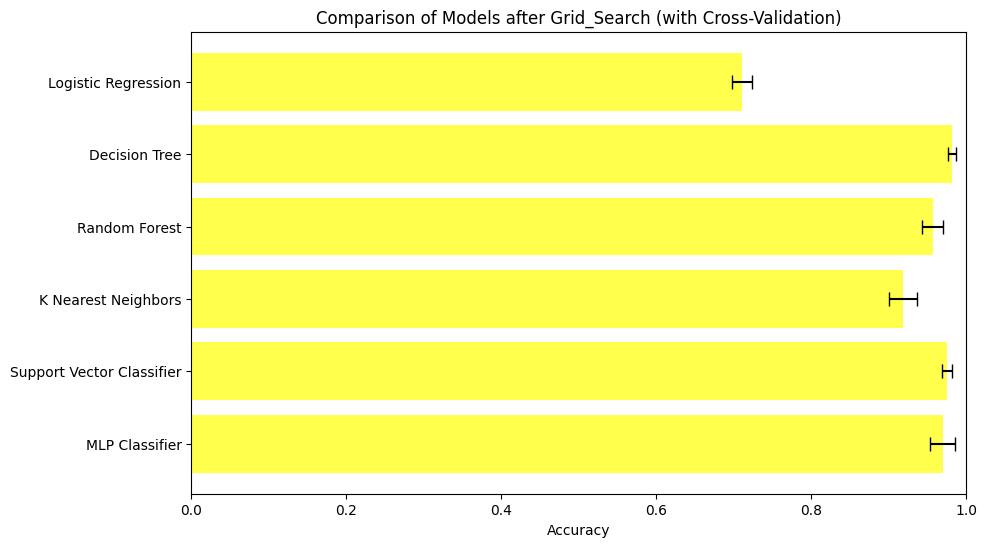

In [30]:
import matplotlib.pyplot as plt
import numpy as np

# Mean accuracy scores and standard deviations
mean_scores = [scores.mean() for scores in results.values()]
std_devs = [scores.std() for scores in results.values()]

# Model names
models = list(results.keys())

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(models, mean_scores, xerr=std_devs, color='yellow', alpha=0.7, capsize=5)
plt.xlabel('Accuracy')
plt.title('Comparison of Models after Grid_Search (with Cross-Validation)')
plt.xlim(0, 1)
plt.gca().invert_yaxis()  # Invert y-axis to display the highest accuracy on top
plt.show()


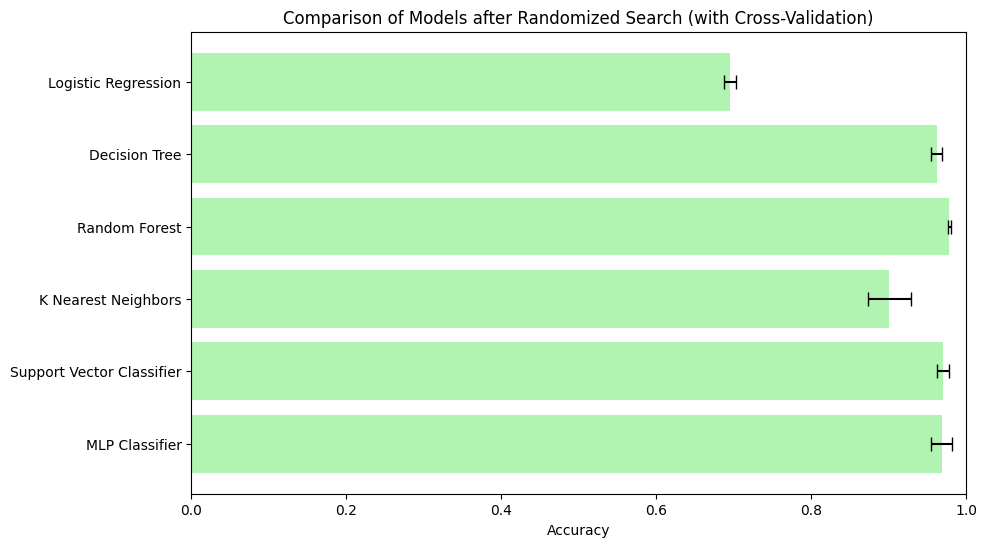

In [31]:
import matplotlib.pyplot as plt
import numpy as np

# Mean accuracy scores and standard deviations
mean_scores = [scores.mean() for scores in results_randomized_search.values()]
std_devs = [scores.std() for scores in results_randomized_search.values()]

# Model names
models = list(results_randomized_search.keys())

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(models, mean_scores, xerr=std_devs, color='lightgreen', alpha=0.7, capsize=5)
plt.xlabel('Accuracy')
plt.title('Comparison of Models after Randomized Search (with Cross-Validation)')
plt.xlim(0, 1)
plt.gca().invert_yaxis()  # Invert y-axis to display the highest accuracy on top
plt.show()


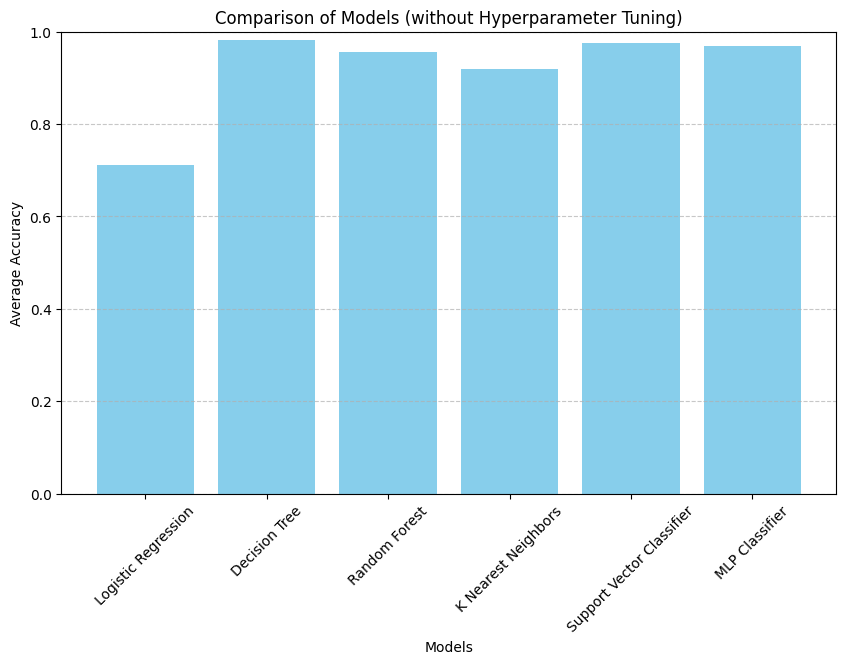

In [32]:
import matplotlib.pyplot as plt

# Extract average accuracy scores for each model
average_scores = {name: scores.mean() for name, scores in results.items()}

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(average_scores.keys(), average_scores.values(), color='skyblue')
plt.xlabel('Models')
plt.ylabel('Average Accuracy')
plt.title('Comparison of Models (without Hyperparameter Tuning)')
plt.xticks(rotation=45)
plt.ylim(0, 1)  # Set y-axis limit to 0-1 for accuracy percentage
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


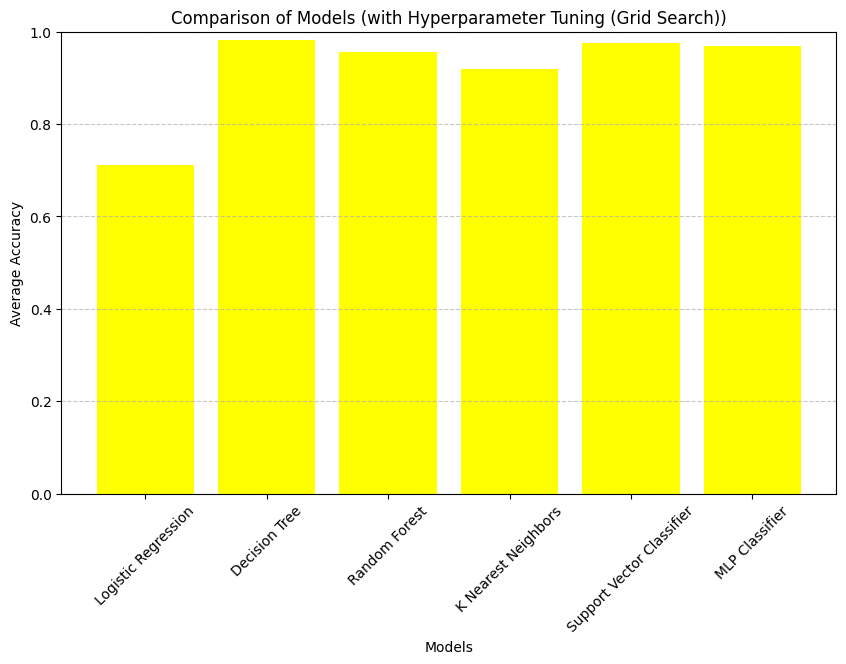

In [33]:
import matplotlib.pyplot as plt

# Extract average accuracy scores for each model after grid search
average_scores = {name: scores.mean() for name, scores in results.items()}

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(average_scores.keys(), average_scores.values(), color='yellow')
plt.xlabel('Models')
plt.ylabel('Average Accuracy')
plt.title('Comparison of Models (with Hyperparameter Tuning (Grid Search))')
plt.xticks(rotation=45)
plt.ylim(0, 1)  # Set y-axis limit to 0-1 for accuracy percentage
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


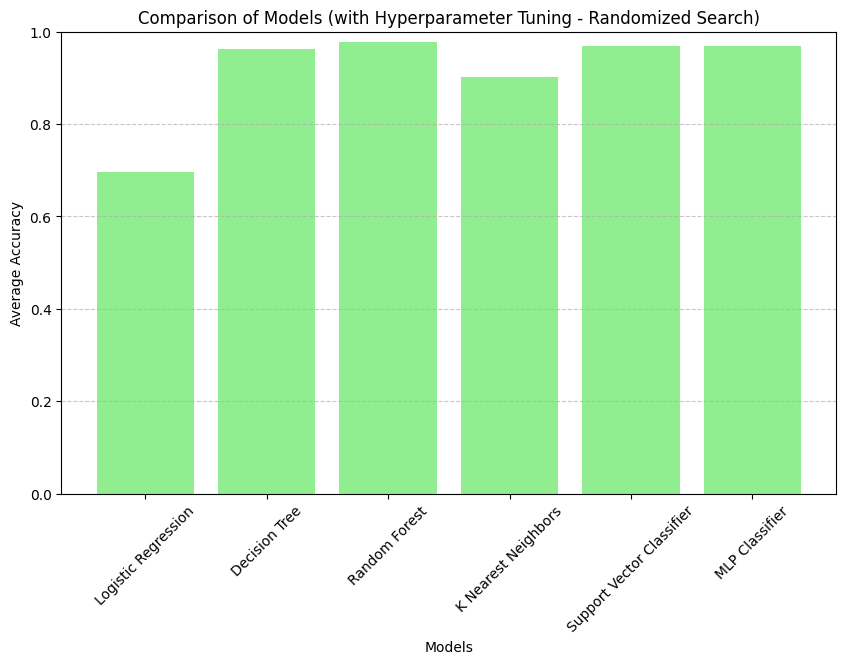

In [34]:
import matplotlib.pyplot as plt

# Extract average accuracy scores for each model after randomized search
average_scores_randomized_search = {name: scores.mean() for name, scores in results_randomized_search.items()}

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(average_scores_randomized_search.keys(), average_scores_randomized_search.values(), color='lightgreen')
plt.xlabel('Models')
plt.ylabel('Average Accuracy')
plt.title('Comparison of Models (with Hyperparameter Tuning - Randomized Search)')
plt.xticks(rotation=45)
plt.ylim(0, 1)  # Set y-axis limit to 0-1 for accuracy percentage
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
